In [61]:
""" Author:Zahra Khambaty
                            Project: Book Recommendation System Using Machine Learning 

"""
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import cross_validation as cv
from sklearn.metrics.pairwise import pairwise_distances


In [62]:
# Reading all the respective csv files
usrs = pd.read_csv('BX-Users.csv',sep=';',error_bad_lines=False,encoding="latin-1",low_memory=False)# Users
bks = pd.read_csv('BX-Books.csv',sep=';',error_bad_lines=False,low_memory=False)# books
bks_ratings= pd.read_csv('BX-Book-Ratings.csv',sep=';',error_bad_lines=False,low_memory=False) # user-book ratings


Skipping line 3996: expected 1 fields, saw 2
Skipping line 4161: expected 1 fields, saw 2
Skipping line 4597: expected 1 fields, saw 2
Skipping line 5217: expected 1 fields, saw 2
Skipping line 8123: expected 1 fields, saw 2
Skipping line 8564: expected 1 fields, saw 2
Skipping line 9227: expected 1 fields, saw 3
Skipping line 9603: expected 1 fields, saw 2
Skipping line 10563: expected 1 fields, saw 3
Skipping line 11693: expected 1 fields, saw 2
Skipping line 11874: expected 1 fields, saw 2
Skipping line 12231: expected 1 fields, saw 2
Skipping line 12631: expected 1 fields, saw 6
Skipping line 14261: expected 1 fields, saw 2
Skipping line 17020: expected 1 fields, saw 2
Skipping line 17051: expected 1 fields, saw 4
Skipping line 25718: expected 1 fields, saw 2
Skipping line 25818: expected 1 fields, saw 2
Skipping line 25820: expected 1 fields, saw 4
Skipping line 26311: expected 1 fields, saw 3
Skipping line 27829: expected 1 fields, saw 3
Skipping line 29133: expected 1 fields, sa

Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9
Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9
Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9
Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 8 fields, saw 9
Skipping line 251296: expected 8 fields, saw 9
Skipping line 259941: expected 8 fields, saw 9
Skipping line 261529: expected 8 fields, saw 9



In [54]:
""" 
Step1: Data Exploration and Data Sanitization

Books

Data Columns: 8 'ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'
271360 entries 
Image Urls not needed hence drop them
Make sure all ISBNs are unique """

print bks.info()
bks = bks.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'])
print bks.head()
bks.ISBN.value_counts() 
#All unique book ids
bks['Book-Title'].value_counts()
print


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                   271360 non-null object
Book-Title             271360 non-null object
Book-Author            271359 non-null object
Year-Of-Publication    271360 non-null object
Publisher              271358 non-null object
Image-URL-S            271360 non-null object
Image-URL-M            271360 non-null object
Image-URL-L            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB
None
         ISBN  \
0  0195153448   
1  0002005018   
2  0060973129   
3  0374157065   
4  0393045218   

                                                                                           Book-Title  \
0  Classical Mythology                                                                                  
1  Clara Callan                                                                                         
2  Decision in Normandy                                   

In [55]:
# Check for publishing years 
print bks['Year-Of-Publication'].unique()

['2002' '2001' '1991' '1999' '2000' '1993' '1996' '1988' '2004' '1998'
 '1994' '2003' '1997' '1983' '1979' '1995' '1982' '1985' '1992' '1986'
 '1978' '1980' '1952' '1987' '1990' '1981' '1989' '1984' '0' '1968' '1961'
 '1958' '1974' '1976' '1971' '1977' '1975' '1965' '1941' '1970' '1962'
 '1973' '1972' '1960' '1966' '1920' '1956' '1959' '1953' '1951' '1942'
 '1963' '1964' '1969' '1954' '1950' '1967' '2005' '1957' '1940' '1937'
 '1955' '1946' '1936' '1930' '2011' '1925' '1948' '1943' '1947' '1945'
 '1923' '2020' '1939' '1926' '1938' '2030' '1911' '1904' '1949' '1932'
 '1928' '1929' '1927' '1931' '1914' '2050' '1934' '1910' '1933' '1902'
 '1924' '1921' '1900' '2038' '2026' '1944' '1917' '1901' '2010' '1908'
 '1906' '1935' '1806' '2021' '2012' '2006' 'DK Publishing Inc' 'Gallimard'
 '1909' '2008' '1378' '1919' '1922' '1897' '2024' '1376' '2037']


In [5]:
# Fixing the Publishing Year
pd.set_option('display.max_colwidth', -1)
bks.loc[bks['Year-Of-Publication']=='DK Publishing Inc',:]

ISBN  \
209538  078946697X   
221678  0789466953   

                                                                                                         Book-Title  \
209538  DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"          
221678  DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"   

       Book-Author Year-Of-Publication  \
209538  2000        DK Publishing Inc    
221678  2000        DK Publishing Inc    

                                                           Publisher  
209538  http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg  
221678  http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg

In [6]:
bks.loc[bks['Year-Of-Publication']=='Gallimard',:]


ISBN  \
220731  2070426769   

                                                                     Book-Title  \
220731  Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le Cl�?©zio"   

       Book-Author Year-Of-Publication  \
220731  2003        Gallimard            

                                                           Publisher  
220731  http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg

In [7]:
bks.loc[bks['ISBN']=='078946697X','Year-Of-Publication']= 2000
bks.loc[bks['ISBN']=='078946697X','Book-Author']= 'Michael Teitelbaum'
bks.loc[bks['ISBN']=='078946697X','Publisher']= 'DK Publishing Inc'
bks.loc[bks['ISBN']=='078946697X','Book-Title']= 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'

In [8]:
bks.loc[bks['ISBN']=='0789466953','Year-Of-Publication']= 2000
bks.loc[bks['ISBN']=='0789466953','Book-Author']= 'James Buckley'
bks.loc[bks['ISBN']=='0789466953','Publisher']= 'DK Publishing Inc'
bks.loc[bks['ISBN']=='0789466953','Book-Title']= 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'

In [9]:
bks.loc[bks['ISBN']=='2070426769','Year-Of-Publication']= 2003
bks.loc[bks['ISBN']=='2070426769','Book-Author']= 'Jean-Marie Gustave Le Cl�?©zio'
bks.loc[bks['ISBN']=='2070426769','Publisher']= 'Gallimard'
bks.loc[bks['ISBN']=='2070426769','Book-Title']= "Peuple du ciel, suivi de 'Les Bergers'"

In [10]:
sorted(bks['Year-Of-Publication'].unique())
# Note that Publication Years 0 and greater than 2020 are invalid
# I havent dealt with this case yet. We can replace it with Nan or unknown

[2000,
 2003,
 '0',
 '1376',
 '1378',
 '1806',
 '1897',
 '1900',
 '1901',
 '1902',
 '1904',
 '1906',
 '1908',
 '1909',
 '1910',
 '1911',
 '1914',
 '1917',
 '1919',
 '1920',
 '1921',
 '1922',
 '1923',
 '1924',
 '1925',
 '1926',
 '1927',
 '1928',
 '1929',
 '1930',
 '1931',
 '1932',
 '1933',
 '1934',
 '1935',
 '1936',
 '1937',
 '1938',
 '1939',
 '1940',
 '1941',
 '1942',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2008',
 '2010',
 '2011',
 '2012',
 '2020',
 '2021',

In [11]:
# Duplicate book-titles exist:
# Titles with Unique Author but same titles e.g Selected Poems ,Titles with Same Author Unique Publisher/Publishing Date ,Capital vs small letters
dups1 = bks.loc[(bks['Book-Title']=='Wuthering Heights')&(bks['Publisher']=='Bantam')]
dups1.head()

ISBN         Book-Title   Book-Author Year-Of-Publication  \
993   0553212583  Wuthering Heights  EMILY BRONTE  1983                 
1050  0553211412  Wuthering Heights  Emily Bronte  1983                 

     Publisher  
993   Bantam    
1050  Bantam

In [12]:
dups2 = bks.loc[(bks['Book-Title']=='Selected Poems')]
dups2.head()

ISBN      Book-Title              Book-Author  \
4523    081120958X  Selected Poems  William Carlos Williams   
39416   0811201465  Selected Poems  K. Patchen                
41316   0679750800  Selected Poems  Rita Dove                 
106885  0060931744  Selected Poems  Gwendolyn Brooks          
118775  0517101548  Selected Poems  John Donne                

       Year-Of-Publication                              Publisher  
4523    1985                New Directions Publishing Corporation  
39416   1957                New Directions Publishing Corporation  
41316   1993                Vintage Books USA                      
106885  1999                Perennial                              
118775  1994                Gramercy Books

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276035 entries, 0 to 276034
Data columns (total 5 columns):
User-ID    276035 non-null object
City       276035 non-null object
State      276035 non-null object
Country    276035 non-null object
Age        276035 non-null object
dtypes: object(5)
memory usage: 10.5+ MB


/Users/macbookpro/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


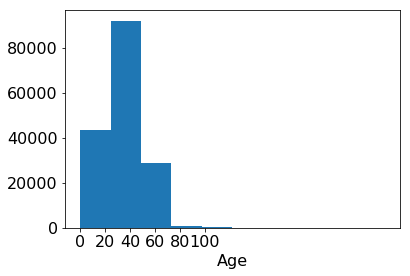

In [13]:
"""Users
I divided the location into 3 columns as City, State and Country
"""
users = pd.DataFrame(usrs['User-ID,Location,,,Age,,,,,'].str.split(',',expand=True).values,columns=['User-ID', 'City','State','Country','Age','4','5','6','7','8'])
users = users.drop(['4','5','6','7','8'], axis=1)
users.info()
users["User-ID"].value_counts() 
# All unique users
# number of users where age is null: 109080
count_no_age = users.loc[users.Age == 'NULL','Age'].count()
Age_not_null = users.loc[(users.Age != 'NULL') & (users.Age != '')]
Age_not_null[['Age']] = Age_not_null[['Age']].astype(int)
# Age distribution
plt.rc("font", size=16)
plt.hist(Age_not_null['Age'])
hist_labels = np.arange(0,101,20)
plt.xticks(hist_labels)
plt.xlabel('Age')
plt.show()

# Users ages range mostly between 20-60 years

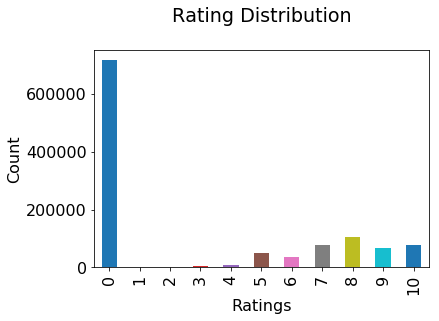

In [14]:
"""
Ratings:
149780 entries
User-ID        1149780 non-null int64
ISBN           1149780 non-null object
Book-Rating    1149780 non-null int64
"""
# Making sure there are unique pairs of users and books rated
# bks_ratings = bks_ratings.drop_duplicates(['User-ID','ISBN'])
#The ratings are very unevenly distributed, and the vast majority of ratings are 0.
plt.rc("font", size=16)
bks_ratings['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [15]:
# Choosing the Recommendation Algorithm

# Choosing the 5 highly ranked books (naaive basic way)
# Problems- not all books are rated by every user
#         - there are many books rated 0
# I choose only those books that are rated by atleast 30 Users(random number)

average_rating = pd.DataFrame(bks_ratings.groupby('ISBN')['Book-Rating'].mean())
average_rating['Count'] = pd.DataFrame(bks_ratings.groupby('ISBN')['Book-Rating'].count())
average_rating = average_rating.loc[average_rating['Count']>=30]
print average_rating.sort_values('Book-Rating', ascending=False).head()
print
print average_rating['Book-Rating'].describe()
# Results are extremely sparce -need to remove ratings that are zero

            Book-Rating  Count
ISBN                          
1844262553  7.962963     54   
0060256672  7.121212     33   
0060248025  6.921053     38   
0553274325  6.750000     32   
0439064864  6.611765     170  

count    4405.000000
mean     2.965942   
std      0.959589   
min      0.258065   
25%      2.281250   
50%      2.920635   
75%      3.589744   
max      7.962963   
Name: Book-Rating, dtype: float64


In [16]:
# Lets see what happens if we remove all books rated zero
average_rating = pd.DataFrame((bks_ratings.loc[bks_ratings['Book-Rating']!=0]).groupby('ISBN')['Book-Rating'].mean())
average_rating['Count'] = pd.DataFrame(bks_ratings.groupby('ISBN')['Book-Rating'].count())
average_rating =average_rating.loc[average_rating['Count']>=30]
print average_rating.sort_values('Book-Rating', ascending=False).head()
print average_rating['Book-Rating'].describe()
#Recommended books when zero ratings were removed hence the average ratings increased
books_titles = pd.DataFrame(['0439425220', '0060256656', '0618002235', '0020868308', '0836218221'],index=np.arange(5), columns=['ISBN'])
book_names = pd.merge(books_titles, bks, on='ISBN')
book_names

            Book-Rating  Count
ISBN                          
0439425220  9.869565     40   
0060256656  9.750000     35   
0618002235  9.720000     39   
0020868308  9.625000     34   
0836218221  9.600000     35   
count    4405.000000
mean     7.649345   
std      0.657662   
min      4.390706   
25%      7.255102   
50%      7.680412   
75%      8.071429   
max      9.869565   
Name: Book-Rating, dtype: float64


ISBN  \
0  0439425220   
1  0060256656   
2  0618002235   
3  0020868308   
4  0836218221   

                                                                                                                                                               Book-Title  \
0  Harry Potter and the Chamber of Secrets Postcard Book                                                                                                                    
1  The Giving Tree                                                                                                                                                          
2  The Two Towers (The Lord of the Rings, Part 2)                                                                                                                           
3  Mere Christianity: A revised and enlarged edition, with a new introduction, of the three books, The case for Christianity, Christian behaviour, and Beyond personality   
4  The Authoritative Calvin and Hobbes (Calvin and Hobbes)                                                                                                                  

        Book-Author Year-Of-Publication                  Publisher  
0  J. K. Rowling     2002                Scholastic                 
1  Shel Silverstein  1964                HarperCollins Publishers   
2  J. R. R. Tolkien  1999                Houghton Mifflin Company   
3  C. S Lewis        1984                Macmillan Pub. Co          
4  Bill Watterson    1990                Andrews McMeel Publishing

In [28]:
print bks_ratings.shape
print bks.shape
print users.shape
print bks.shape[0]*users.shape[0]

ratings_new = bks_ratings[bks_ratings.ISBN.isin(bks.ISBN)]
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]
print ratings_new.shape

# This shows that the users have definitely rated books that are not part of the books dataset

(1149780, 3)
(271360, 5)
(276035, 5)
74904857600
(1020468, 3)


In [29]:
# Collaborative Filtering (Item-Item)

# here i use only those ratings that are part of the users and books file and where the ratings are non zero
new_ratings = ratings_new.loc[ratings_new['Book-Rating']!=0] 
# how many times has the books been rated
count_books = pd.DataFrame(new_ratings.groupby('ISBN')['Book-Rating'].count())
count_books = count_books.rename(columns={'Book-Rating':'Book Counts'})
count_books = count_books.reset_index()
new_ratings = pd.merge(new_ratings, count_books, on='ISBN')
# how many books has the user rated
count_Users = pd.DataFrame(new_ratings.groupby('User-ID')['Book-Rating'].count())
count_Users = count_Users.rename(columns={'Book-Rating':'User-ID Counts'})
count_Users = count_Users.reset_index()
new_ratings = pd.merge(new_ratings, count_Users, on='User-ID')

# Using the dataset where the book has been rated by more than 50 users and each user has rated atleast 50 books.
new_ratings = new_ratings.loc[(new_ratings['Book Counts']>=50) & (new_ratings['User-ID Counts']>=50)]
train_data, test_data = cv.train_test_split(new_ratings, test_size=0.25)

In [30]:
# Generating  a 2D ratings matrix from new ratings table    
ratings_matrix_train = train_data.pivot(index='User-ID', columns='ISBN', values='Book-Rating')
ratings_matrix_test =  test_data.pivot(index='User-ID', columns='ISBN', values='Book-Rating')

In [31]:
# since NaNs cannot be handled by training algorithms, replacing these by 0, which indicates absence of ratings
# setting data type
ratings_matrix_train.fillna(0, inplace = True)
ratings_matrix_train= ratings_matrix_train.astype(np.int32)

ratings_matrix_test.fillna(0, inplace = True)
ratings_matrix_test= ratings_matrix_test.astype(np.int32)


In [32]:
#  Algorithm to calculating similarity between books using scikit-learn
item_similarity = pairwise_distances(ratings_matrix_train.values.T, metric='cosine')
def predict(ratings, similarity, type='item'):
    if type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [33]:
item_predictions =pd.DataFrame(predict(ratings_matrix_train.values, item_similarity, type='item'),index =ratings_matrix_train.index,columns = ratings_matrix_train.columns)


In [44]:
bks.loc[bks['ISBN']=='1559029838',:]

ISBN        Book-Title  Book-Author Year-Of-Publication  \
3078  1559029838  Call of the Wild  Jack London  0                    

                     Publisher  
3078  Selldowns/no More Orders

In [34]:
# Using this particular book-ISBN to get recommendations -absolutely random

book_id= "1559029838" # Call of the Wild	Jack London
predict = item_predictions[book_id].sort_values(ascending=False)
mask = predict.index.isin([book_id])
predict=predict[~mask]
# Users that liked the following book
sim_users = predict[:5]
sim_users

User-ID
11676     3.696764
95359     1.244037
16795     1.171653
104636    0.900099
60244     0.829456
Name: 1559029838, dtype: float64

In [47]:
index = list(sim_users.index)
list_books=[]
# Build Recommendations
# Recommend books used by other users with book-ratings above 6
for i in index:
    recommendations = ratings_new.loc[(ratings_new['User-ID']==i)& (ratings_new['Book-Rating']>6)]
    #recommendations = recommendations.sort_values(by=['Book-Rating'],ascending=False)
    list_books.append((recommendations['ISBN'].head(3)).values)

In [48]:
# Get Book Titles 
flat_list = [item for sublist in list_books for item in sublist]
book_ids = pd.DataFrame(flat_list,index=np.arange(len(flat_list)), columns=['ISBN'])
book_names = pd.merge(book_ids, bks, on='ISBN')
book_names

ISBN  \
0   0002005018   
1   0002118580   
2   0002184974   
3   0001056107   
4   002026478X   
5   0060096195   
6   0020280505   
7   0020419805   
8   006001203X   
9   0060256672   
10  0060740450   
11  0061009059   
12  0007154615   
13  0020868308   
14  006000942X   

                                                                                                                                                                Book-Title  \
0   Clara Callan                                                                                                                                                             
1   Audacity to believe                                                                                                                                                      
2   Nigel Mansell My Autobiography                                                                                                                                           
3   Farmer Giles of Ham: And Other Stories                                                                                                                                   
4   AGE OF INNOCENCE (MOVIE TIE-IN)                                                                                                                                          
5   The Boy Next Door                                                                                                                                                        
6   HOW TO STAY ALIVE IN THE WOODS                                                                                                                                           
7   Helen Keller: From Tragedy to Triumph (The Childhood of Famous Americans Series)                                                                                         
8   Dr. Atkins' New Diet Revolution                                                                                                                                          
9   Where the Sidewalk Ends : Poems and Drawings                                                                                                                             
10  One Hundred Years of Solitude (Oprah's Book Club)                                                                                                                        
11  One for the Money (Stephanie Plum Novels (Paperback))                                                                                                                    
12  Unless : A Novel                                                                                                                                                         
13  Mere Christianity: A revised and enlarged edition, with a new introduction, of the three books, The case for Christianity, Christian behaviour, and Beyond personality   
14  How to Read Literature Like a Professor : A Lively and Entertaining Guide to Reading Between the Lines                                                                   

               Book-Author Year-Of-Publication               Publisher  
0   Richard Bruce Wright    2001                HarperFlamingo Canada   
1   Sheila Cassidy          1977                Collins                 
2   Nigel Mansell           1996                Harpercollins           
3   J. R. R. Tolkien        1999                Trafalgar Square        
4   Edith Wharton           1993                Scribner                
5   Meggin Cabot            2002                Avon Trade              
6   Bradford Angier         1962                Scribner Paper Fiction  
7   Katharine Wilkie        1986                Aladdin                 
8   Robert C. Atkins        2001                Avon Books              
9   Shel Silverstein        1974                HarperCollins           
10  Gabriel Garcia Marquez  2004                Perennial               
11  Janet Evanovich         1995                HarperTorch 

In [ ]:
""" Brief analysis on outputs

I have presented 2 recommendation outputs:

1) The first is a baseline recommendation that is solely based on popular average ratings
2) The second is based on a version of item-item collaborative filtering. 
the reason i chose this algorithm is because of  the fact that that people have certain preferences
and their likes(that infrequently change) usually depend on that however this means the model is not dynamic and cannot change often.
I also tried recommending items by highest ratings using the same algorithm. I still need to compare and find similarites between the recommended books.

The challenging part is more to test out how well the algorithm performed and whether the results make sense.

In my second output my recommendations(Clara Callan,AGE OF INNOCENCE,Unless : A Novel,The Boy Next Door,One for the money) were all novels which were similar to the book('Call of the Wild') 
however few of the recommendations were off point including biographies like "Nigel Mansell My Autobiography"
and reference works like "how to stay alive in the woods".The algorithm still 
needs a lot of fine-tuning to be able to have better recommendations.

"""

In [ ]:
"""Notes: things that have not been considered/dealt with
1) Duplicate Authors
2) Publication Years 0 and greater than 2018
3) Metrics to evaluate the model(would have used mean squared error and other statistical measures)
4) Could not figure out how to accomodate the test set in this case (need to think about it more)
Things to try: 
Normalizing the dataset
Recommendations based on age,
Similar types of user-item (collaborative filtering),
model based colaborative filtering

It was a fun exercise

Thank you for the opportunity

"""


In [ ]:
# References:
# http://aimotion.blogspot.com/2009/11/collaborative-filtering-implementation.html
# https://datascienceplus.com/building-a-book-recommender-system-the-basics-knn-and-matrix-factorization/
# http://files.grouplens.org/papers/www10_sarwar.pdf
# https://cambridgespark.com/content/tutorials/implementing-your-own-recommender-systems-in-Python/index.html